## Time Series Analysis

In [231]:
import pandas as pd
df = pd.read_csv('finaldata.csv')

### **Popularity Analysis**

Let's check the popularity of the Queries, or A.I. related terms, in the dataset which will help us better understand the popularity before we delve into the sentiments' changes.

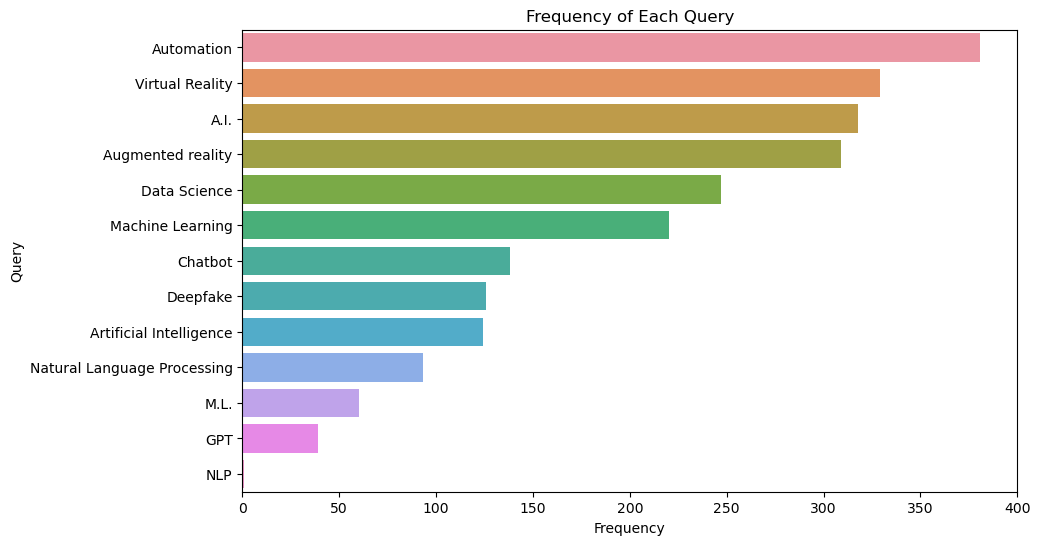

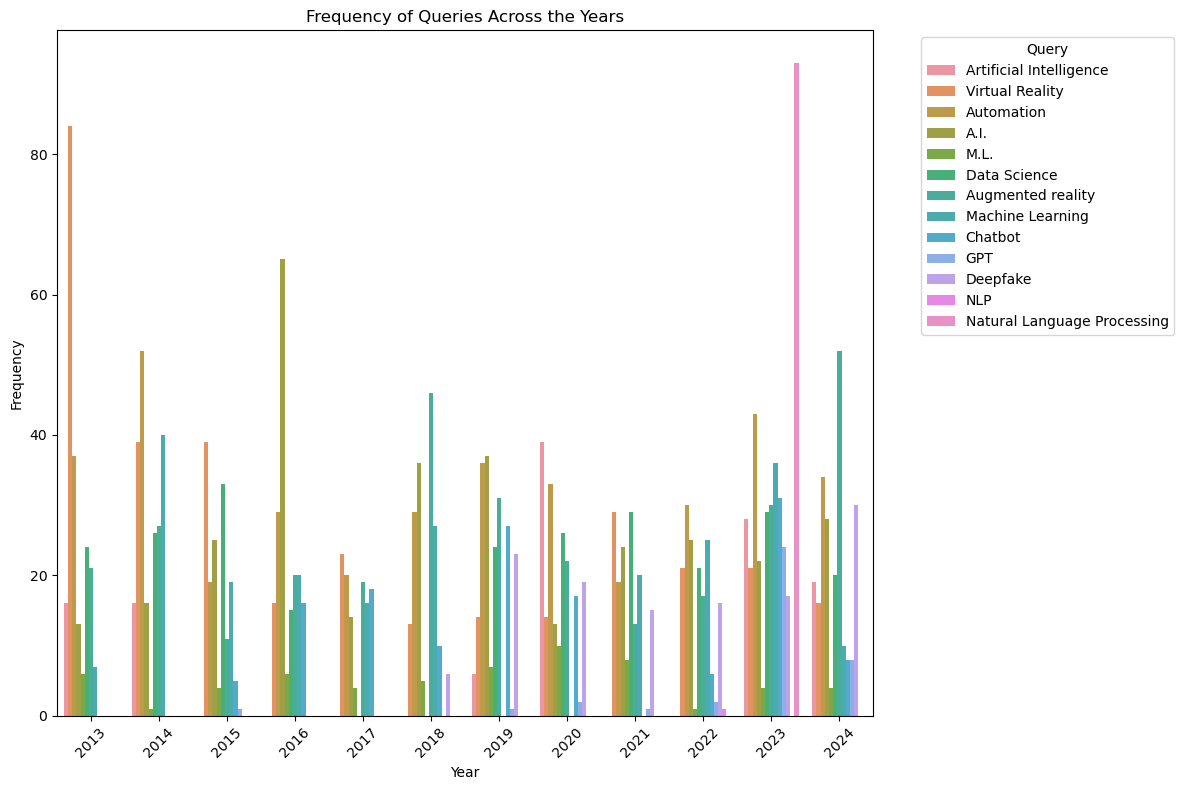

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('finaldata.csv')
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

df['Year'] = df['Publication Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(y='Query', data=df, order=df['Query'].value_counts().index)
plt.title('Frequency of Each Query')
plt.xlabel('Frequency')
plt.ylabel('Query')
plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(x='Year', hue='Query', data=df)
plt.title('Frequency of Queries Across the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Query', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Now, let's inspect the average sentiment depending on each query.

### WordCloud

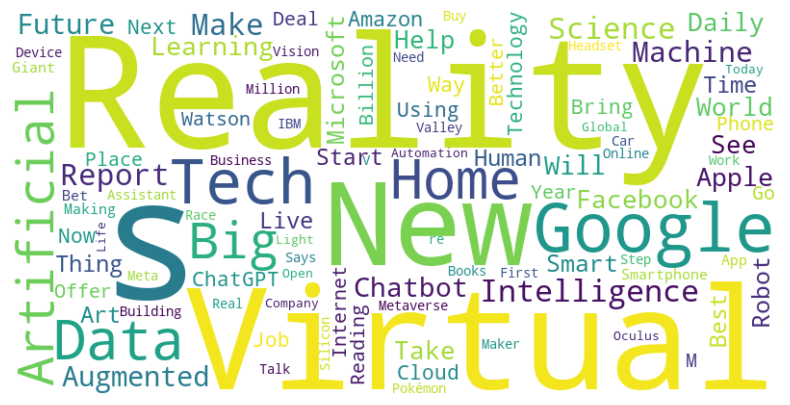

In [233]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

query_positive = df[df['Sentiment'] > 0.5]['Headline'].str.cat(sep=' ')

wordcloud = WordCloud(
    width=800,             
    height=400,             
    background_color='white', 
    max_words=100,      
    contour_color='steelblue',
    contour_width=1,         
    collocations=False        
).generate(query_positive)

plt.figure(figsize=(10, 5))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')              
plt.show()


Let's now start with the **Time Series Analysis**.

/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/1337586146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Publication Date'] = pd.to_datetime(dft['Publication Date'])


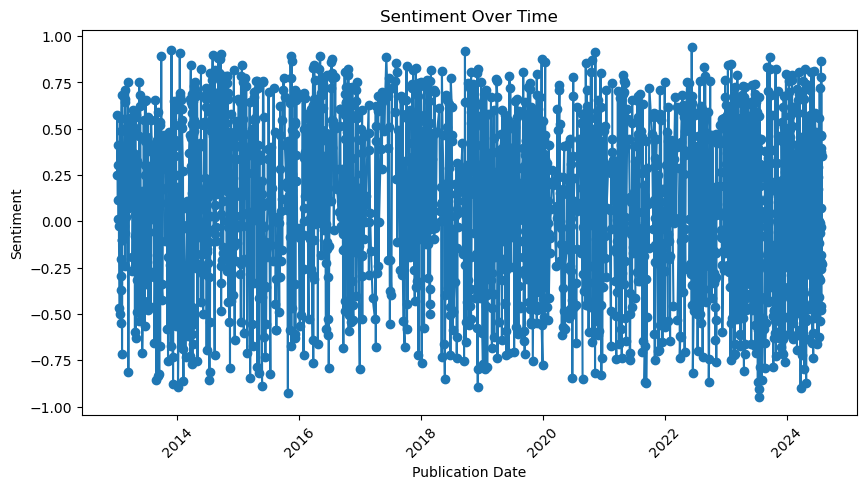

In [234]:
dft = df[['Publication Date','Sentiment']]
dft['Publication Date'] = pd.to_datetime(dft['Publication Date'])
dft.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dft['Publication Date'], dft['Sentiment'], marker='o')

plt.title('Sentiment Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

This is extremely messy and we cannot interpret anything, we try two methods to help us with making this data more interpretable: Grouping by months (then years) and using the RollingMean.

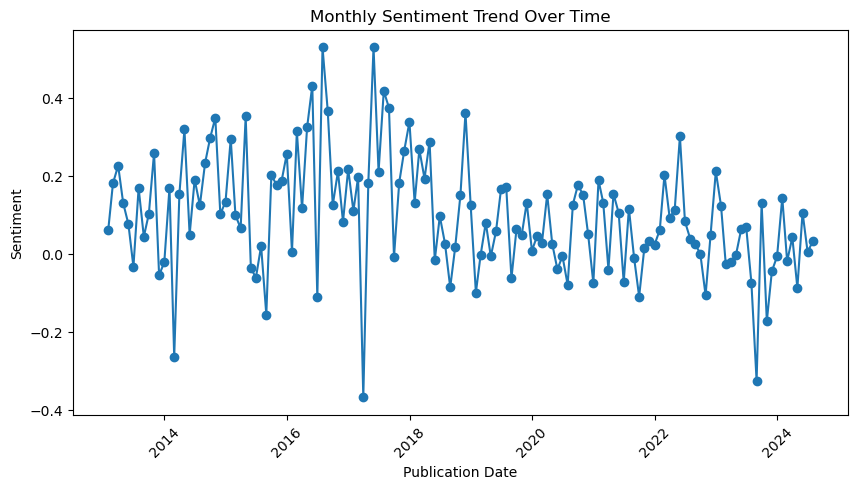

In [235]:
dft_monthly = dft.resample('M', on='Publication Date').mean()

plt.figure(figsize=(10, 5))
plt.plot(dft_monthly.index, dft_monthly['Sentiment'], marker='o')

plt.title('Monthly Sentiment Trend Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

In [236]:
import pandas as pd
import calendar

dft['Month'] = dft['Publication Date'].dt.month

monthly_avg_sentiment = dft.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment.index = monthly_avg_sentiment.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment)

Month
January      0.108732
February     0.085067
March        0.062255
April        0.107529
May          0.114229
June         0.044625
July         0.078315
August       0.046974
September    0.107573
October      0.123949
November     0.096096
December     0.087529
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/2395567148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Month'] = dft['Publication Date'].dt.month


### First Half 

In [237]:
import pandas as pd
import calendar


first_5_years = dft[dft['Publication Date'].dt.year <= 2018] 
first_5_years['Month'] = first_5_years['Publication Date'].dt.month


monthly_avg_sentiment_first_5 = first_5_years.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment_first_5.index = monthly_avg_sentiment_first_5.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment_first_5)


Month
January      0.139416
February     0.182141
March        0.133720
April        0.260757
May          0.153137
June         0.045659
July         0.201745
August       0.124939
September    0.131337
October      0.229458
November     0.148372
December     0.138792
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/755722506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5_years['Month'] = first_5_years['Publication Date'].dt.month


### Second Half 

In [238]:

first_5_years = dft[dft['Publication Date'].dt.year > 2018] 
first_5_years['Month'] = first_5_years['Publication Date'].dt.month


monthly_avg_sentiment_first_5 = first_5_years.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment_first_5.index = monthly_avg_sentiment_first_5.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment_first_5)

Month
January      0.084396
February     0.017654
March        0.025413
April        0.011905
May          0.084270
June         0.043907
July         0.013836
August      -0.037382
September    0.083810
October     -0.020289
November     0.042885
December     0.031140
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/953469790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5_years['Month'] = first_5_years['Publication Date'].dt.month


This is a good visula to give us the general idea. Let's further use years.

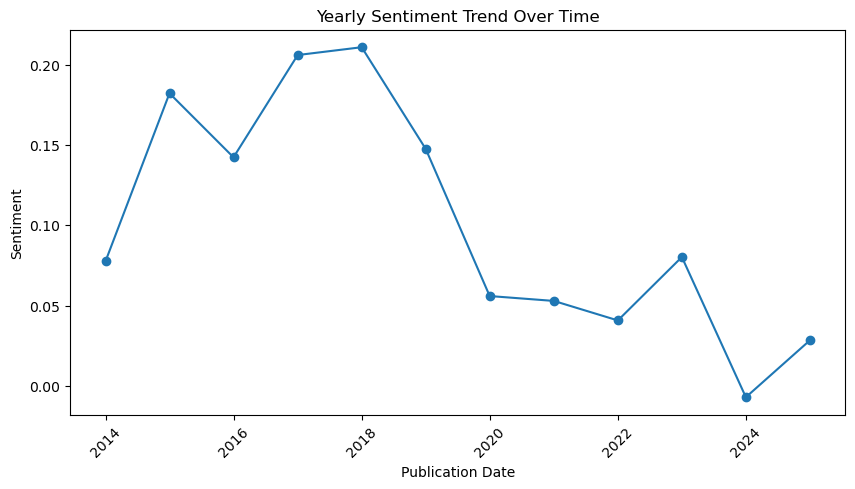

In [239]:
dft_yearly = dft.resample('Y', on='Publication Date').mean()

plt.figure(figsize=(10, 5))
plt.plot(dft_yearly.index, dft_yearly['Sentiment'], marker='o')

plt.title('Yearly Sentiment Trend Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

Now, let's move on to the Time Series Forecasting. In order to proceed with the forecasting, we avaluate the performance of 3 models: Random Forests, GBM and XGBoost. We then use the RMSE score to better judge and compare the performance of each model.


Let's prepare the data.

In [240]:
df = pd.read_csv('finaldata.csv')
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

def create_lagged_features(data, lag=365):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df['Sentiment'], lag=365)

# Step 3: Train-test split (80% training data, 20% test data)
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train.drop('Sentiment', axis=1), train['Sentiment']
X_test, y_test = test.drop('Sentiment', axis=1), test['Sentiment']


df_yearly = df.resample('Y', on='Publication Date').mean()

def create_lagged_features(data, lag=5):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df_yearly['Sentiment'], lag=5)

train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_trainy, y_trainy = train.drop('Sentiment', axis=1), train['Sentiment']
X_testy, y_testy = test.drop('Sentiment', axis=1), test['Sentiment']


df_monthly = df.resample('M', on='Publication Date').mean()

def create_lagged_features(data, lag=12):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df_monthly['Sentiment'], lag=12).copy()

# Step 3: Train-test split (80% training data, 20% test data)
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_trainm, y_trainm = train.drop('Sentiment', axis=1), train['Sentiment']
X_testm, y_testm = test.drop('Sentiment', axis=1), test['Sentiment']

/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/167464133.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lagged[f'lag_{i}'] = data.shift(i)
/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/167464133.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lagged[f'lag_{i}'] = data.shift(i)
/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_30190/167464133.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

## Random Forests

In [241]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Step 4: Train the Random Forest model for the original data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on test data for the original data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate the test error (RMSE) for the original Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

# Train and evaluate the model for the second pair of data: X_trainy, y_trainy
rf_model_y = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_y.fit(X_trainy, y_trainy)

y_pred_trainy_rf = rf_model_y.predict(X_trainy)
y_pred_testy_rf = rf_model_y.predict(X_testy)

rmse_rf_y = np.sqrt(mean_squared_error(y_testy, y_pred_testy_rf))

# Train and evaluate the model for the third pair of data: X_trainm, y_trainm
rf_model_m = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_m.fit(X_trainm, y_trainm)

y_pred_trainm_rf = rf_model_m.predict(X_trainm)
y_pred_testm_rf = rf_model_m.predict(X_testm)

rmse_rf_m = np.sqrt(mean_squared_error(y_testm, y_pred_testm_rf))



## XGBoost

In [242]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 6: Train the XGBoost model for the original data
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on test data for the original data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the test error (RMSE) for the original data
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Train and evaluate the XGBoost model for the second pair of data: X_trainy, y_trainy
model_y = xgb.XGBRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
model_y.fit(X_trainy, y_trainy)

y_pred_trainy = model_y.predict(X_trainy)
y_pred_testy = model_y.predict(X_testy)

rmse_y = np.sqrt(mean_squared_error(y_testy, y_pred_testy))

# Train and evaluate the XGBoost model for the third pair of data: X_trainm, y_trainm
model_m = xgb.XGBRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
model_m.fit(X_trainm, y_trainm)

y_pred_trainm = model_m.predict(X_trainm)
y_pred_testm = model_m.predict(X_testm)

rmse_m = np.sqrt(mean_squared_error(y_testm, y_pred_testm))


## GBM

In [243]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 8: Train the Gradient Boosting model for the original data
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Step 9: Make predictions on test data for the original data
y_pred_train_gbm = gbm_model.predict(X_train)
y_pred_test_gbm = gbm_model.predict(X_test)

# Calculate the test error (RMSE) for the original Gradient Boosting model
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_test_gbm))

# Train and evaluate the Gradient Boosting model for the second pair of data: X_trainy, y_trainy
gbm_model_y = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model_y.fit(X_trainy, y_trainy)

y_pred_trainy_gbm = gbm_model_y.predict(X_trainy)
y_pred_testy_gbm = gbm_model_y.predict(X_testy)

rmse_gbm_y = np.sqrt(mean_squared_error(y_testy, y_pred_testy_gbm))

# Train and evaluate the Gradient Boosting model for the third pair of data: X_trainm, y_trainm
gbm_model_m = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model_m.fit(X_trainm, y_trainm)

y_pred_trainm_gbm = gbm_model_m.predict(X_trainm)
y_pred_testm_gbm = gbm_model_m.predict(X_testm)

rmse_gbm_m = np.sqrt(mean_squared_error(y_testm, y_pred_testm_gbm))


In [244]:

data = {
    "Data Frequency": ["Daily", "Yearly", "Monthly"],
    "Random Forests RMSE": [rmse_rf, rmse_rf_y, rmse_rf_m],
    "XGBoost RMSE": [rmse, rmse_y, rmse_m],
    "GBM RMSE": [rmse_gbm, rmse_gbm_y, rmse_gbm_m]
}

# Convert dictionary to DataFrame for tabular representation
rmse_table = pd.DataFrame(data)

# Display the table
print(rmse_table)



  Data Frequency  Random Forests RMSE  XGBoost RMSE  GBM RMSE
0          Daily             0.413566      0.213566  0.414271
1         Yearly             0.054264      0.036857  0.053422
2        Monthly             0.158326      0.172288  0.175501


XGBoost is the most accurate (with the least RMSE)! We thereby use it to forecast.

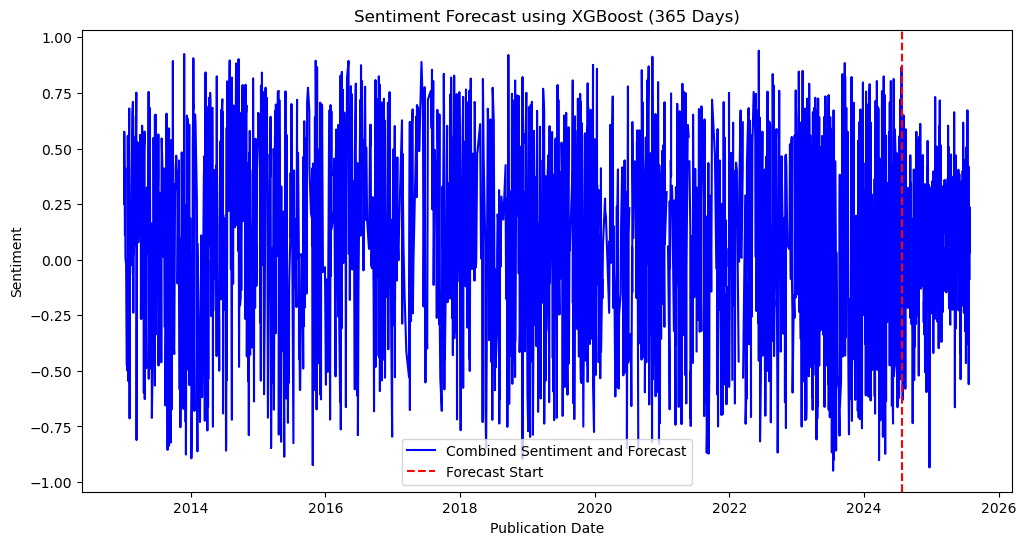

In [ ]:

def create_lagged_features(data, lag=12):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df['Sentiment'], lag=12)

# Train-test split
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train.drop('Sentiment', axis=1), train['Sentiment']
X_test, y_test = test.drop('Sentiment', axis=1), test['Sentiment']

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.9, random_state=42)
model.fit(X_train, y_train)

last_lags = df_lagged.drop('Sentiment', axis=1).iloc[-1].values.reshape(1, -1)
forecast = []

for i in range(365):  # Forecast 365 time steps into the future
    next_pred = model.predict(last_lags)[0]
    forecast.append(next_pred)

    # Update the lagged features with the new prediction
    last_lags = np.roll(last_lags, -1)
    last_lags[0, -1] = next_pred

forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=365)
forecast_series = pd.Series(forecast, index=forecast_index)

# Combine the original sentiment data with the forecast
combined_series = pd.concat([df['Sentiment'], forecast_series])

# Plot the combined series
plt.figure(figsize=(12, 6))
plt.plot(combined_series.index, combined_series, label='Combined Sentiment and Forecast', color='blue')
plt.axvline(df.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Sentiment Forecast using XGBoost (365 Days)')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')
plt.show()


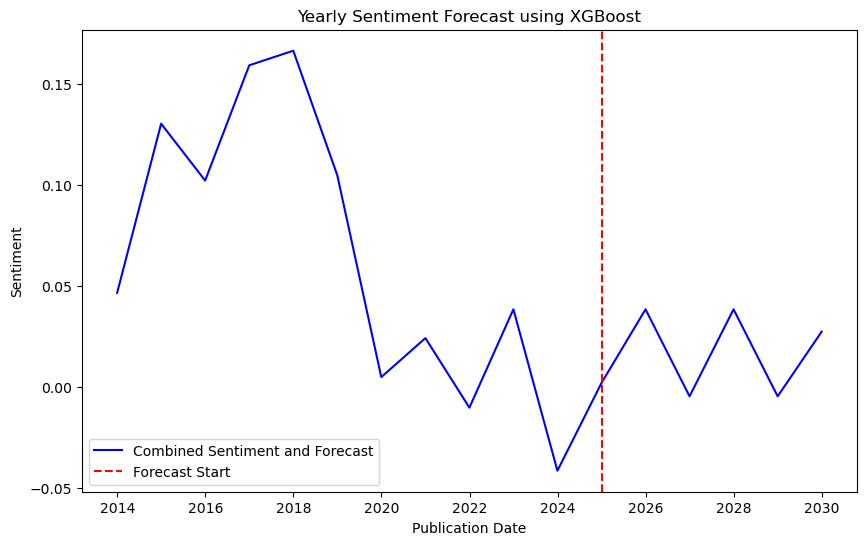

In [223]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
last_lags = df_lagged.drop('Sentiment', axis=1).iloc[-1].values.reshape(1, -1)
forecast = []

for i in range(5): 
    next_pred = model.predict(last_lags)[0]
    forecast.append(next_pred)

    last_lags = np.roll(last_lags, -1)
    last_lags[0, -1] = next_pred 

forecast_index = pd.date_range(df_yearly.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
forecast_series = pd.Series(forecast, index=forecast_index)

combined_series = pd.concat([df_yearly['Sentiment'], forecast_series])

plt.figure(figsize=(10, 6))
plt.plot(combined_series.index, combined_series, label='Combined Sentiment and Forecast', color='blue')
plt.axvline(df_yearly.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Yearly Sentiment Forecast using XGBoost')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')
plt.show()

Although the yearly trend is easier to comment on, it is wiser to take the monthly data in order to capture the seasonality in the model.

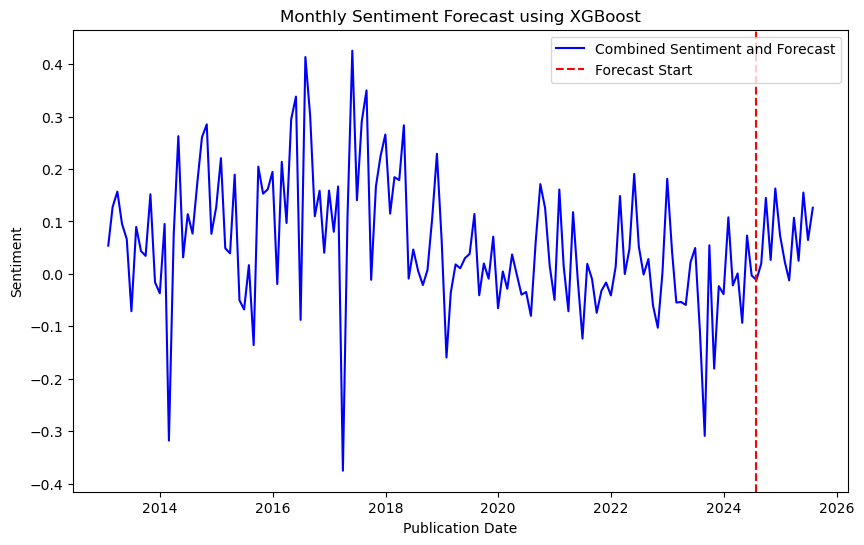

In [224]:

df_monthly = df.resample('M', on='Publication Date').mean()

def create_lagged_features(data, lag=12):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df_monthly['Sentiment'], lag=12)

train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train.drop('Sentiment', axis=1), train['Sentiment']
X_test, y_test = test.drop('Sentiment', axis=1), test['Sentiment']

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

last_lags = df_lagged.drop('Sentiment', axis=1).iloc[-1].values.reshape(1, -1)
forecast = []

for i in range(12):  # Forecast 12 months into the future
    next_pred = model.predict(last_lags)[0]
    forecast.append(next_pred)

    last_lags = np.roll(last_lags, -1)
    last_lags[0, -1] = next_pred  

forecast_index = pd.date_range(df_monthly.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Combine the original sentiment data with the forecast
combined_series = pd.concat([df_monthly['Sentiment'], forecast_series])

plt.figure(figsize=(10, 6))
plt.plot(combined_series.index, combined_series, label='Combined Sentiment and Forecast', color='blue')
plt.axvline(df_monthly.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Monthly Sentiment Forecast using XGBoost')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')
plt.show()